In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

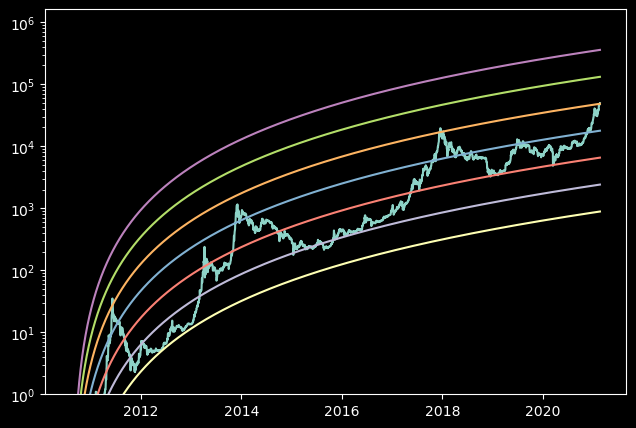

In [74]:
# df = pd.read_csv('./data/1d/BTCUSDT__1d__2010-01-01.csv', 
#                  names=["time","open","high","low","close","volume","sclose_time","quote_volume","number_of_trades",
#                         "taker_base_volume","taker_quote_volume","ignore"])

df = pd.read_csv('./data/BCHAIN-MKPRU-BTCUSD.csv')

df = df.iloc[::-1]
# df['time'] = pd.to_datetime(df['time'], unit='ms')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Value'] > 0]

def funct(x, p1, p2):
    return p1*np.log(x) + p2

xdata = np.array([x + 1 for x in range(len(df))])
ydata = np.log(df['Value'])
popt, pcov = curve_fit(funct, xdata, ydata)

fittedydata = funct(xdata, popt[0], popt[1])

plt.style.use('dark_background')

plt.semilogy(df['Date'], df['Value'])

for i in range(-2, 5):
#     plt.plot(df['Date'], np.exp(fittedydata + i/1.2))
    plt.plot(df['Date'], np.exp(fittedydata + i))
#     plt.fill_between(df['Date'], np.exp(fittedydata + i - 1), np.exp(fittedydata + i), alpha = 0.4)

plt.ylim(bottom=1)
plt.show()